__Importing the necessary components/libraries__

In [1]:
from IPython.display import Image
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import IPython

print('Libraries imported.')

Libraries imported.


# Seattle vs. Vancouver #

# PART I #

# I.  INTRODUCTION #

## Background ##

__Jan Kowalski, PhD__ is a professor of data science at the Gdańsk University of Technology.
He specializes in the processing of natural languages, although other areas of data processing and data analysis are also of interest to him. He published numerous articles and books in his field of interest.

https://pg.edu.pl

and 

a professor of applied lingustics University of Gdańsk. 

https://ug.edu.pl

He specializes in the processing of natural languages, although other areas of data processing and data analysis are also of interest to him. He published numerous articles and books in his field of interest.
He is well known in international circles thanks to the participation in numerous seminars and other events where he delivers presentations of his extraordinary achievements.

He is 40 years old, single, devoted to his work.

He likes theatre and baroque music and contemporary art. From time to time he likes to watch a good film.
He also is an accomplished sailor.

Professor Kowalski regularly receives invitations from various foreign universities to come and to teach and run research there.

Recently he has received two invitations to work:

from 

__University of Seattle, Seatle, WA__

and

from

__University of British Columbia, Vancouver, BC__

Professor Kowalski is supposed to run classes for students of the universities in the following majors:

- data science
- data science in computational Linguistics.

He will also be able to continu his work in the area of processing natural languages.

# II.  GEOLOCATION OF THE POINTS OF INTEREST #

In order to make a decision about choosing the target University, prof. Kowalski will gather the information about the socio-cultural offer of both cities.

In the first step the data on the administrative division of the cities (neighbourhoods) will be collected and clustered.

Then, the most interesting areas (closest to the Universities) will be chosen and the data on the available venues in the chosen radius will be sourced.

The radius will be 1000 m but alternatively, one can change the catchment area by changing the radius. If we assume that the catchment area must be no bigger than 1-hour walk then the distance should not exceed 4000-5000 m.
This would make our radius equal to 2000-2500 m.
With such radius we will find more venues and can run more reliable analysis.

Both universities are not very far apart

In [6]:
unilocdata = pd.DataFrame({
   'lt':[47.61087,49.25959],
   'ln':[-122.31781,-123.24553],
   'name':['Seattle University','University of British Columbia'],
   }, dtype=str)
unilocdata["lt"] = unilocdata['lt'].astype(float, errors='raise')
unilocdata['ln'] = unilocdata['ln'].astype(float, errors='raise')
unilocdata

,lt,ln,name
0,47.61087,-122.31781,Seattle University
1,49.25959,-123.24553,University of British Columbia


In [7]:
us_can_map= folium.Map(location=[48.36976,-122.29658],zoom_start=8)

for i in range(0,len(unilocdata)):
   folium.Marker(
      location=[unilocdata.iloc[i]['lt'], unilocdata.iloc[i]['ln']],
      popup=unilocdata.iloc[i]['name'],
   ).add_to(us_can_map)
us_can_map

### The map produced by the code above (screenshot) ###

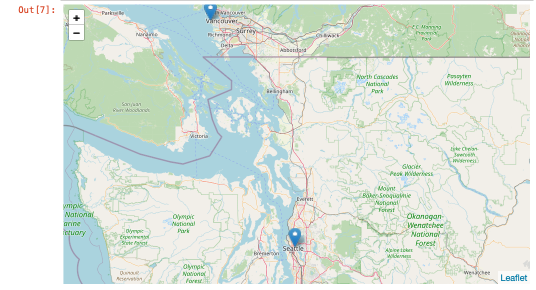

In [8]:
Image("//Users/BoTi/Desktop/us_can_map.png", width=500, height=500)

Both places are very well located in terms of sailing,

Seattle - Puget Sound

Vancouver - Strait of Georgia

Therefore, in this analysis we will concentrate on the availability of other venues interesting to professor Kowalski, i.e.

- concert halls,
- art galleries,
- theatres (dramatic),
- cinemas.

We will also see the __top pics__ from Foursquare to check which city offers more of a social life for a 40-year-old acomplished scientists. This will include top ranked restaurants, museums, parks and sightseeing places. 

# III. VANCOUVER ###

### Data finding and preparation ###

In case of Vancouver we will concentrate on the central part of the city 

In [9]:
address = 'Vancouver, BC'

geolocator = Nominatim(user_agent="vancouver_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Vancouver, BC are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vancouver, BC are 49.2608724, -123.1139529.


In [10]:
v_lat=latitude
v_lon=longitude

In [11]:
van_map=folium.Map(location=[location.latitude, location.longitude],zoom_start=12)
van_map

### The map produced by the code above (screenshot) ###

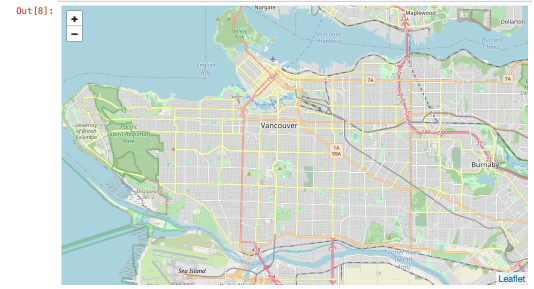

In [12]:
Image("//Users/BoTi/Desktop/vanc1_map.png", width=500, height=500)

# IV. The same with SEATTLE: #

Locating the city and presenting the map

In [13]:
address = 'Seattle, WA'

geolocator = Nominatim(user_agent="seattle_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Seattle, WA are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Seattle, WA are 47.6038321, -122.3300624.


In [14]:
stl_map=folium.Map(location=[location.latitude,location.longitude],zoom_start=11)
stl_map

### The map produced by the code above (screenshot) ###

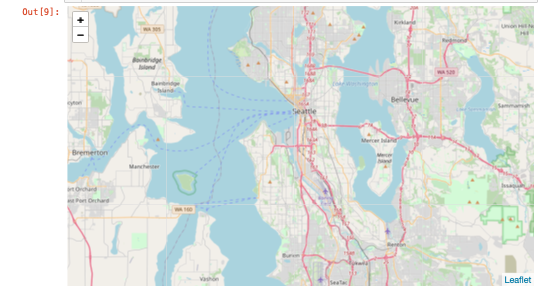

In [15]:
Image("//Users/BoTi/Desktop/stle1_map.png", width=500, height=500)

# IV. Finding the geo data for Vancouver, BC #

initially it was intended to use the posta-codes data base as a source of geo data for Vancouver. However, the analysis of the active codes showed there are 17,556 postal codes under the name of "VANCOUVER"

Therefore the data has been sourced from the publicly accessible city geo-spatial data provided by the city of Vancouver.

The data was downloaded and preprocessed into the csv file.

Only records pertaining the city of Vancouver were chosen (no suburban areas were taken into consideration).


The location data was uploaded to the notebook in a form of the csv file.

Geographical coordinates were changed from 'object'-type to 'float'.

Importing the geolocation data of Vancouver.
The original dataset was downloaded from https://opendata.vancouver.ca/explore/dataset/local-area-boundary/export/?location=12,49.2474,-123.12402&dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6ImxvY2FsLWFyZWEtYm91bmRhcnkiLCJvcHRpb25zIjp7fX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6ImNvbHVtbiIsImZ1bmMiOiJDT1VOVCIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiMwMjc5QjEifV0sInhBeGlzIjoibmFtZSIsIm1heHBvaW50cyI6NTAsInNvcnQiOiIifV0sInRpbWVzY2FsZSI6IiIsImRpc3BsYXlMZWdlbmQiOnRydWUsImFsaWduTW9udGgiOnRydWV9
to the desktop and then read into the notebook.

In [16]:
van1=pd.read_csv('//Users/BoTi/Desktop/Vancouver-local-area-boundary.csv',delimiter=';')

In [17]:
for i in range(0,len(van1)):
    van1["latitude"] = van1['latitude'].astype(float, errors='raise')
    van1['longitude'] = van1['longitude'].astype(float, errors='raise')
van1.drop(['geo_point_2d'], axis=1, inplace=True)   

In [18]:
van1

,MAPID,Name,latitude,longitude
0,AR,Arbutus-Ridge,49.246805,-123.161669
1,CBD,Downtown,49.280747,-123.116567
2,FAIR,Fairview,49.264540,-123.131049
3,GW,Grandview-Woodland,49.276440,-123.066728
4,HS,Hastings-Sunrise,49.277934,-123.040270
5,MARP,Marpole,49.210207,-123.128382
6,RP,Riley Park,49.244766,-123.103147
7,SHAU,Shaughnessy,49.245681,-123.139760
8,STR,Strathcona,49.278219,-123.088235
9,WE,West End,49.285011,-123.135438


In [19]:
van2_map=folium.Map([49.25207,-123.10365])

for mapid, name, lt,ln in zip(van1['MAPID'], van1['Name'],van1['latitude'],van1['longitude']):
    label = '{}, {}, {}, {}'.format(mapid, name, lt,ln)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lt,ln],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(van2_map)
    
van2_map

### The map produced by the code above (screenshot) ###

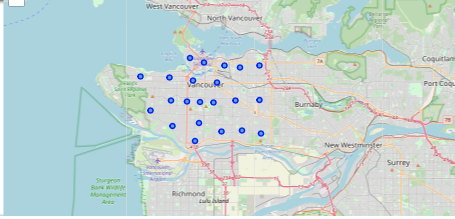

In [20]:
Image("//Users/BoTi/Desktop/vanc2_map.png", width=500, height=500)

In [17]:
van1.dtypes

MAPID         object
Name          object
latitude     float64
longitude    float64
dtype: object

# V. Clustering the city areas of Vancouver #

The purpose of clustering is to choose the most suitable areas from the point of view of Professor Kowalski.

We will choose the clusters sorrounding the University.

In [41]:
k=5
van_clustering = van1.drop(['MAPID','Name'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(van_clustering)
kmeans.labels_
van1.insert(0, 'Cluster Labels', kmeans.labels_)

van1

,Cluster Labels,MAPID,Name,latitude,longitude
0,2,AR,Arbutus-Ridge,49.246805,-123.161669
1,4,CBD,Downtown,49.280747,-123.116567
2,4,FAIR,Fairview,49.264540,-123.131049
3,3,GW,Grandview-Woodland,49.276440,-123.066728
4,3,HS,Hastings-Sunrise,49.277934,-123.040270
5,1,MARP,Marpole,49.210207,-123.128382
6,1,RP,Riley Park,49.244766,-123.103147
7,1,SHAU,Shaughnessy,49.245681,-123.139760
8,3,STR,Strathcona,49.278219,-123.088235
9,4,WE,West End,49.285011,-123.135438


In [19]:
van1.columns

Index(['Cluster Labels', 'MAPID', 'Name', 'latitude', 'longitude'], dtype='object')

In [20]:
van1.dtypes

Cluster Labels      int32
MAPID              object
Name               object
latitude          float64
longitude         float64
dtype: object

In [21]:
van1.shape

(22, 5)

### A map showing the clusters in relation to the University ###

In [42]:

# create map
van_map_clusters = folium.Map(location=[49.25207,-123.10365],zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, name, cluster in zip(van1['latitude'], van1['longitude'], van1['Name'], van1['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(van_map_clusters)
       

folium.Marker(
      location=[unilocdata.iloc[1]['lt'], unilocdata.iloc[1]['ln']],
      popup=unilocdata.iloc[1]['name'],
   ).add_to(van_map_clusters)

van_map_clusters


### The map produced by the code above (screenshot) ###

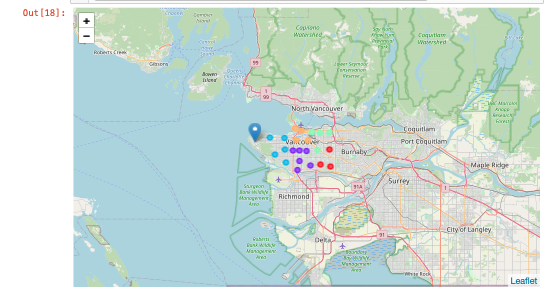

In [23]:
Image("//Users/BoTi/Desktop/vanc_clust_map.png", width=500, height=500)

In [44]:
van_centroids  = kmeans.cluster_centers_ 
clust=2
van_centroids[clust]

array([  49.24887264, -123.17551089])

We will check the presence of the specific venues in clusters one of the following  clusters: nbr 1, 2 & 4

- concert halls
- art galleries
- theatres (dramatic)
- cinemas.

As prof.Kowalski is a sailor, he will also be interested in local __marinas/yachtclubs__.

The analysis of the availability of various venues will be made bearing on the data downloaded from Foursquare.

# VI. SEATTLE - the geo data for the city #

From the database of postal codes for the USA nad Canada I filtered the geo data for the zip-codes usingthe following filter:

- state - __WA__
- county -__KING__
- city - __SEATTLE__

This file, however did not contain the names of the neighbourhoods.
Therefore the information about the Seattle nwighbourhoods was collected from

- https://data-seattlecitygis.opendata.arcgis.com
- Google Maps

combined and pre-processed to be uploaded into this notebook as the csv-file.

In [23]:
stl1=pd.read_csv('//Users/BoTi/Desktop/Seattle_neighbourhoods.csv',delimiter=';')

In [24]:
for i in range(0,len(stl1)):
    stl1["latitude"] = stl1['latitude'].astype(float, errors='raise')
    stl1['longitude'] = stl1['longitude'].astype(float, errors='raise')
stl1

,City,Name,latitude,longitude,geo_data
0,Seattle,Fremont,47.657288,-122.348277,"47.65728762006992,-122.34827650061001"
1,Seattle,Denny Triangle,47.619529,-122.339402,"47.61952916824775, -122.33940206127204"
2,Seattle,Seattle Chinatown,47.602146,-122.322944,"47.602145970581255, -122.32294405661024"
3,Seattle,Matthews Beach,47.700225,-122.274471,"47.70022520848284, -122.27447099462175"
4,Seattle,Northeast Seattle,47.679411,-122.291344,"47.679411151923766, -122.2913440947815"
5,Seattle,Bryant,47.674319,-122.287571,"47.67431884982148, -122.28757083346513"
6,Seattle,Northwest Seattle,47.693773,-122.343918,"47.69377320142052, -122.3439178619668"
7,Seattle,Capitol Hill,47.629681,-122.324021,"47.62968125746418, -122.32402128296313"
8,Seattle,Central District,47.611855,-122.295547,"47.6118548892842, -122.29554687447758"
9,Seattle,West Seattle,47.570683,-122.387498,"47.57068286086406, -122.38749789129703"


In [25]:
address = 'Seattle, WA'

geolocator = Nominatim(user_agent="seattle_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Seattle, WA are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Seattle, WA are 47.6038321, -122.3300624.


In [26]:
s_loc=[latitude, longitude]


In [27]:
stl2_map=folium.Map([location.latitude, location.longitude])

for city, name, lt,ln in zip(stl1['City'],stl1['Name'],stl1['latitude'],stl1['longitude']):
    label = '{}, {}, {}, {}'.format(city, name, lt,ln)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lt,ln],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(stl2_map)
    
stl2_map

### The map produced by the code above (screenshot) ###

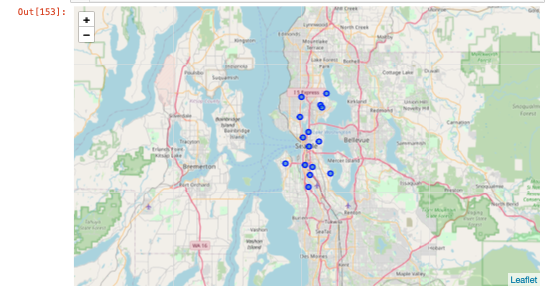

In [28]:
Image("//Users/BoTi/Desktop/stle2_map.png", width=500, height=500)

In [30]:
stl1.dtypes

City          object
Name          object
latitude     float64
longitude    float64
geo_data      object
dtype: object

In [31]:
stl1.shape

(15, 5)

# VII. Clustering the areas of Seattle and showing the cluster in relation to the location of teh University #

In [34]:
k=7
stl_clustering = stl1.drop(['City','Name','geo_data'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(stl_clustering)
kmeans.labels_
stl1.insert(0, 'Cluster Labels', kmeans.labels_)

stl1

,Cluster Labels,City,Name,latitude,longitude,geo_data
0,2,Seattle,Fremont,47.657288,-122.348277,"47.65728762006992,-122.34827650061001"
1,4,Seattle,Denny Triangle,47.619529,-122.339402,"47.61952916824775, -122.33940206127204"
2,4,Seattle,Seattle Chinatown,47.602146,-122.322944,"47.602145970581255, -122.32294405661024"
3,1,Seattle,Matthews Beach,47.700225,-122.274471,"47.70022520848284, -122.27447099462175"
4,1,Seattle,Northeast Seattle,47.679411,-122.291344,"47.679411151923766, -122.2913440947815"
5,1,Seattle,Bryant,47.674319,-122.287571,"47.67431884982148, -122.28757083346513"
6,2,Seattle,Northwest Seattle,47.693773,-122.343918,"47.69377320142052, -122.3439178619668"
7,4,Seattle,Capitol Hill,47.629681,-122.324021,"47.62968125746418, -122.32402128296313"
8,6,Seattle,Central District,47.611855,-122.295547,"47.6118548892842, -122.29554687447758"
9,3,Seattle,West Seattle,47.570683,-122.387498,"47.57068286086406, -122.38749789129703"


In [33]:
stl1.columns

Index(['Cluster Labels', 'City', 'Name', 'latitude', 'longitude', 'geo_data'], dtype='object')

In [34]:
stl1.dtypes

Cluster Labels      int32
City               object
Name               object
latitude          float64
longitude         float64
geo_data           object
dtype: object

In [35]:

# create map
stl_map_clusters = folium.Map(location=[location.latitude,location.longitude],zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, name, cluster in zip(stl1['latitude'], stl1['longitude'], stl1['Name'], stl1['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(stl_map_clusters)
       
# add marker for the University
folium.Marker(
      location=[unilocdata.iloc[0]['lt'], unilocdata.iloc[0]['ln']],
      popup=unilocdata.iloc[0]['name'],
   ).add_to(stl_map_clusters)

# show the map
stl_map_clusters


In [40]:
stl_centroids  = kmeans.cluster_centers_ 
clust=4
stl_centroids[clust]

array([  47.6171188 , -122.32878913])

We will check the presence of the specific venues in clusters nbr 4

- concert halls
- art galleries
- theatres (dramatic)
- cinemas
- marinas, yachtclubs.

### The map produced by the code above (screenshot) ###

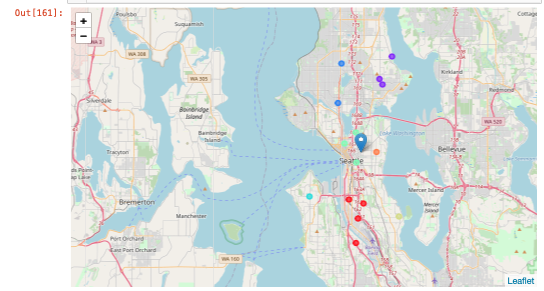

In [37]:
Image("//Users/BoTi/Desktop/stle_clust_map.png", width=500, height=500)

# PART II #

1. In the second part of the project we will import from Forsquare the information about the venues in the selected areas.

2. We will filter the group of the sought-for types of venues.

3. We will compare the number of particular venues.

## Vancouver data from Foursquare ##

In [46]:
van_loc=van_centroids[4]
van_loc

array([  49.27334092, -123.12039166])

In [56]:
CLIENT_ID = 'RJE5YYJQ1QAALXDUN4XG33JJCNFZTJQ3C2L3P1JUBDIR23GZ' # your Foursquare ID
CLIENT_SECRET = '2UCZ2D0FOMBDHTT0WKCGUGUJNBOQGIG2SVFC3RLFPVF3JYH5' # your Foursquare Secret
ACCESS_TOKEN = 'AMNSQFOKEDN0CQDTKWFXFAGYEQHUSFLNY13ULSMH3GIPZZYU' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RJE5YYJQ1QAALXDUN4XG33JJCNFZTJQ3C2L3P1JUBDIR23GZ
CLIENT_SECRET:2UCZ2D0FOMBDHTT0WKCGUGUJNBOQGIG2SVFC3RLFPVF3JYH5


In [57]:
van1.reset_index(inplace=True)
van1

,index,Cluster Labels,MAPID,Name,latitude,longitude
0,0,2,AR,Arbutus-Ridge,49.246805,-123.161669
1,1,4,CBD,Downtown,49.280747,-123.116567
2,2,4,FAIR,Fairview,49.264540,-123.131049
3,3,3,GW,Grandview-Woodland,49.276440,-123.066728
4,4,3,HS,Hastings-Sunrise,49.277934,-123.040270
5,5,1,MARP,Marpole,49.210207,-123.128382
6,6,1,RP,Riley Park,49.244766,-123.103147
7,7,1,SHAU,Shaughnessy,49.245681,-123.139760
8,8,3,STR,Strathcona,49.278219,-123.088235
9,9,4,WE,West End,49.285011,-123.135438


In [58]:
v1=van1.loc[1,'Name']
v1

'Downtown'

The location of centroid for the cluster nbr 2 is chosen as a centre of the area for  Foursquare data import.

In [59]:
v1_loc=[van_centroids[4]]

Now searching top 100 venues in the area of Downtown in the radius of 1000 m

In [60]:

LIMIT = 100 # number of venues returned by Foursquare API

radius = 1000 # radius in [m]

v_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    v1_loc[0][0], 
    v1_loc[0][1], 
    radius, 
    LIMIT)
v_url 

'https://api.foursquare.com/v2/venues/explore?&client_id=RJE5YYJQ1QAALXDUN4XG33JJCNFZTJQ3C2L3P1JUBDIR23GZ&client_secret=2UCZ2D0FOMBDHTT0WKCGUGUJNBOQGIG2SVFC3RLFPVF3JYH5&v=20180604&ll=49.273340925,-123.1203916615&radius=1000&limit=100'

In [61]:
results = requests.get(v_url).json()
results

{'meta': {'code': 200, 'requestId': '60b09960c8617604c344fb31'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Yaletown',
  'headerFullLocation': 'Yaletown, Vancouver',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 127,
  'suggestedBounds': {'ne': {'lat': 49.28234093400001,
    'lng': -123.10662326542172},
   'sw': {'lat': 49.26434091599999, 'lng': -123.13416005757827}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4aa7ec7cf964a520064e20e3',
       'name': 'La Terrazza Restaurant',
       'location': {'address': '1088 Cambie St.',
        'crossStreet': 'at Pacific Blvd.',
        'lat': 49.27484877745373,
        'lng': -123.11877379671792,
        'labeled

In [62]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [63]:
venues = results['response']['groups'][0]['items']
    
nearby_v_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_v_venues =nearby_v_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_v_venues['venue.categories'] = nearby_v_venues.apply(get_category_type, axis=1)

# clean columns
nearby_v_venues.columns = [col.split(".")[-1] for col in nearby_v_venues.columns]

nearby_v_venues.head()

<ipython-input-63-0db27037ce7d>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_v_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,La Terrazza Restaurant,Italian Restaurant,49.274849,-123.118774
1,Marinaside Seawall,Waterfront,49.272912,-123.119653
2,Minami,Japanese Restaurant,49.275341,-123.120856
3,Mister,Ice Cream Shop,49.275062,-123.121316
4,David Lam Park,Park,49.272467,-123.123866


In [64]:
nearby_v_venues.shape

(100, 4)

In [65]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [66]:
van_venues = getNearbyVenues(names=van1['Name'],
                                   latitudes=van1['latitude'],
                                   longitudes=van1['longitude']
                                  )

Arbutus-Ridge
Downtown
Fairview
Grandview-Woodland
Hastings-Sunrise
Marpole
Riley Park
Shaughnessy
Strathcona
West End
Kensington-Cedar Cottage
Mount Pleasant
Oakridge
Renfrew-Collingwood
Sunset
West Point Grey
Dunbar-Southlands
Kerrisdale
Killarney
Kitsilano
South Cambie
Victoria-Fraserview


In [67]:
van_venues.shape

(450, 7)

In [68]:
van_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arbutus-Ridge,49.246805,-123.161669,Vancouver Affordable Piano Movers,49.245294,-123.162124,Moving Target
1,Arbutus-Ridge,49.246805,-123.161669,Arbutus Village Park,49.249486,-123.158716,Park
2,Arbutus-Ridge,49.246805,-123.161669,Triangle Park,49.245061,-123.167914,Park
3,Downtown,49.280747,-123.116567,L'Hermitage,49.280139,-123.117480,Hotel
4,Downtown,49.280747,-123.116567,Medina Café,49.280565,-123.116859,Breakfast Spot


In [69]:
van_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Arbutus-Ridge,3,3,3,3,3,3
Downtown,61,61,61,61,61,61
Dunbar-Southlands,6,6,6,6,6,6
Fairview,24,24,24,24,24,24
Grandview-Woodland,35,35,35,35,35,35
Hastings-Sunrise,12,12,12,12,12,12
Kensington-Cedar Cottage,14,14,14,14,14,14
Kerrisdale,4,4,4,4,4,4
Killarney,19,19,19,19,19,19


In [96]:
van_venues.groupby('Venue Category').count()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
American Restaurant,1,1,1,1,1,1
Art Gallery,3,3,3,3,3,3
Arts & Crafts Store,4,4,4,4,4,4
Asian Restaurant,3,3,3,3,3,3
Athletics & Sports,2,2,2,2,2,2
BBQ Joint,4,4,4,4,4,4
Bagel Shop,1,1,1,1,1,1
Bakery,6,6,6,6,6,6
Bank,6,6,6,6,6,6


## Seattle data from Foursquare ##

# Geodata for Seattle #

Geo-data for as an input for the query to Foursquare

In [74]:
s_loc=[stl_centroids[4]]
s_loc


[array([  47.6171188 , -122.32878913])]

In [54]:
stl1.reset_index(inplace=True)
stl1

,index,Cluster Labels,City,Name,latitude,longitude,geo_data
0,0,2,Seattle,Fremont,47.657288,-122.348277,"47.65728762006992,-122.34827650061001"
1,1,4,Seattle,Denny Triangle,47.619529,-122.339402,"47.61952916824775, -122.33940206127204"
2,2,4,Seattle,Seattle Chinatown,47.602146,-122.322944,"47.602145970581255, -122.32294405661024"
3,3,1,Seattle,Matthews Beach,47.700225,-122.274471,"47.70022520848284, -122.27447099462175"
4,4,1,Seattle,Northeast Seattle,47.679411,-122.291344,"47.679411151923766, -122.2913440947815"
5,5,1,Seattle,Bryant,47.674319,-122.287571,"47.67431884982148, -122.28757083346513"
6,6,2,Seattle,Northwest Seattle,47.693773,-122.343918,"47.69377320142052, -122.3439178619668"
7,7,4,Seattle,Capitol Hill,47.629681,-122.324021,"47.62968125746418, -122.32402128296313"
8,8,6,Seattle,Central District,47.611855,-122.295547,"47.6118548892842, -122.29554687447758"
9,9,3,Seattle,West Seattle,47.570683,-122.387498,"47.57068286086406, -122.38749789129703"


In [55]:
stl1.dtypes

index               int64
Cluster Labels      int32
City               object
Name               object
latitude          float64
longitude         float64
geo_data           object
dtype: object

In [115]:

LIMIT = 100 # number of venues returned by Foursquare API

radius = 1000 # radius in [m]

s_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    s_loc [0][0], 
    s_loc[0][1], 
    radius, 
    LIMIT)
s_url 

'https://api.foursquare.com/v2/venues/explore?&client_id=RJE5YYJQ1QAALXDUN4XG33JJCNFZTJQ3C2L3P1JUBDIR23GZ&client_secret=2UCZ2D0FOMBDHTT0WKCGUGUJNBOQGIG2SVFC3RLFPVF3JYH5&v=20180604&ll=47.617118798764395,-122.32878913361515&radius=1000&limit=100'

In [116]:
results = requests.get(s_url).json()
results

{'meta': {'code': 200, 'requestId': '60b0a62a62a525488c8f9857'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Belltown',
  'headerFullLocation': 'Belltown, Seattle',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 230,
  'suggestedBounds': {'ne': {'lat': 47.626118807764406,
    'lng': -122.3154625521979},
   'sw': {'lat': 47.60811878976438, 'lng': -122.34211571503239}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '51020084e4b0fb39a60c00bf',
       'name': 'Kedai Makan',
       'location': {'address': '1802 Bellevue Ave',
        'crossStreet': 'at E Howell St',
        'lat': 47.617862625534514,
        'lng': -122.3267

In [117]:
stl_venues = getNearbyVenues(names=stl1['Name'],
                                   latitudes=stl1['latitude'],
                                   longitudes=stl1['longitude']
                                  )

Fremont
Denny Triangle
Seattle Chinatown
Matthews Beach
Northeast Seattle
Bryant
Northwest Seattle
Capitol Hill
Central District
West Seattle
Industrial District
South Seattle
Seward Park
Georgetown
South Park


In [118]:
stl_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Fremont,47.657288,-122.348277,Eyes on Fremont,47.658880,-122.349770,Optical Shop
1,Fremont,47.657288,-122.348277,Book Larder,47.658823,-122.350072,Bookstore
2,Fremont,47.657288,-122.348277,Paseo Caribbean Food,47.658519,-122.350112,Caribbean Restaurant
3,Fremont,47.657288,-122.348277,Fremont Bowl,47.659101,-122.350019,Japanese Restaurant
4,Fremont,47.657288,-122.348277,Rock Creek Seafood & Spirits,47.659440,-122.349758,Seafood Restaurant


In [119]:
stl_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Bryant,2,2,2,2,2,2
Capitol Hill,8,8,8,8,8,8
Central District,36,36,36,36,36,36
Denny Triangle,100,100,100,100,100,100
Fremont,37,37,37,37,37,37
Georgetown,51,51,51,51,51,51
Industrial District,16,16,16,16,16,16
Matthews Beach,5,5,5,5,5,5
Northeast Seattle,15,15,15,15,15,15


In [80]:
stl_venues.shape

(341, 7)

In [89]:
stl_venues.groupby('Venue Category').count()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
American Restaurant,5,5,5,5,5,5
Arcade,1,1,1,1,1,1
Art Gallery,1,1,1,1,1,1
Arts & Crafts Store,2,2,2,2,2,2
Asian Restaurant,2,2,2,2,2,2
Athletics & Sports,1,1,1,1,1,1
Auto Garage,1,1,1,1,1,1
BBQ Joint,1,1,1,1,1,1
Bagel Shop,1,1,1,1,1,1


__Seattle__
No category : Concert Hall
No category : Yachtclub
No category : Cinema

# FINAL ANALYSIS #

In [114]:
venue_cat=['Art Gallery','Concert Hall','Theater','Cinema','Harbor / Marina','Music Venue']
venue_cat

['Art Gallery',
 'Concert Hall',
 'Theater',
 'Cinema',
 'Harbor / Marina',
 'Music Venue']

__Number of venues of particulr category in Vancouver__

In [98]:
van_ag=van_venues[van_venues['Venue Category']== venue_cat[0]]
van_ag

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
26,Downtown,49.280747,-123.116567,Vancouver Art Gallery,49.282827,-123.120457,Art Gallery
183,Riley Park,49.244766,-123.103147,Little Mountain Gallery,49.248131,-123.101606,Art Gallery
325,Mount Pleasant,49.263065,-123.098513,Western Front,49.263738,-123.098920,Art Gallery


In [99]:
print ('Venue category - ', venue_cat[1])
van_ch=van_venues[van_venues['Venue Category']== venue_cat[1]]
van_ch

Venue category -  Concert Hall


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
9,Downtown,49.280747,-123.116567,VSO Music School,49.280088,-123.119148,Concert Hall
12,Downtown,49.280747,-123.116567,Commodore Ballroom,49.280686,-123.120510,Concert Hall
13,Downtown,49.280747,-123.116567,Orpheum Theatre,49.280103,-123.120184,Concert Hall


In [102]:
print ('Venue category - ', venue_cat[2])
van_th=van_venues[van_venues['Venue Category']== venue_cat[2]]
van_th

Venue category -  Theater


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
14,Downtown,49.280747,-123.116567,Queen Elizabeth Theatre,49.280229,-123.112730,Theater
89,Grandview-Woodland,49.276440,-123.066728,The Cultch,49.276710,-123.065922,Theater
109,Grandview-Woodland,49.276440,-123.066728,York Theatre,49.278659,-123.070642,Theater
134,Hastings-Sunrise,49.277934,-123.040270,PNE Family Theatre,49.282017,-123.041808,Theater


In [123]:
print ('Venue category - ', venue_cat[3])
van_cm=van_venues[van_venues['Venue Category']== venue_cat[3]]
van_cm

Venue category -  Cinema


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


In [111]:
print ('Venue category - ', venue_cat[4])
van_hm=van_venues[van_venues['Venue Category']== venue_cat[4]]
van_hm

Venue category -  Harbor / Marina


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
347,West Point Grey,49.268401,-123.203467,Jericho Beach Pier,49.271373,-123.204159,Harbor / Marina


In [113]:
print ('Venue category - ', venue_cat[5])
van_mv=van_venues[van_venues['Venue Category']== venue_cat[5]]
van_mv

Venue category -  Music Venue


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
288,Mount Pleasant,49.263065,-123.098513,Biltmore Cabaret,49.260217,-123.096762,Music Venue


Summary for __VANCOUVER__

| Vanue Category | Number of instances | Weight | Result |
|---|---|---|---|
| Art Gallery | 3 | 20% | 0.60 |
| Concert Hall | 3 |15%| 0.45|
| Music Venue | 1 | 15% | 0.15 |
| Theater | 4 | 10% | 0.40 |
| Cinema | 0 | 5% | 0.00 |
| Harbor / Marina | 1 | 35% | 0.35 |
|---|---|---|---|
|TOTAL | 12 | 100% | 1.95 |

The result __1.95__ will be compared with the same result for Seattle!

__Number of venues of particulr category in Seattle__

In [120]:
stl_ag=stl_venues[stl_venues['Venue Category']== venue_cat[0]]
stl_ag

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
120,Denny Triangle,47.619529,-122.339402,Seattle Glassblowing Studio & Gallery,47.615762,-122.342869,Art Gallery


In [121]:
print ('Venue category - ', venue_cat[1])
stl_ch=stl_venues[stl_venues['Venue Category']== venue_cat[1]]
stl_ch

Venue category -  Concert Hall


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


In [122]:
print ('Venue category - ', venue_cat[2])
stl_th=stl_venues[stl_venues['Venue Category']== venue_cat[2]]
stl_th

Venue category -  Theater


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
31,Fremont,47.657288,-122.348277,Stone Soup Theatre,47.656347,-122.342446,Theater


In [125]:
print ('Venue category - ', venue_cat[3])
stl_cm=stl_venues[stl_venues['Venue Category']== venue_cat[3]]
stl_cm

Venue category -  Cinema


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


In [126]:
print ('Venue category - ', venue_cat[4])
stl_hm=stl_venues[stl_venues['Venue Category']== venue_cat[4]]
stl_hm

Venue category -  Harbor / Marina


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


In [127]:
print ('Venue category - ', venue_cat[5])
stl_mv=stl_venues[stl_venues['Venue Category']== venue_cat[5]]
stl_mv

Venue category -  Music Venue


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


__Summary for Seattle__

| Vanue Category | Number of instances | Weight | Result |
|---|---|---|---|
| Art Gallery | 1 | 20% | 0.20 |
| Concert Hall | 0 |15%| 0.00|
| Music Venue | 0 | 15% | 0.00 |
| Theater | 1 | 10% | 0.10 |
| Cinema | 0 | 5% | 0.00 |
| Harbor / Marina | 0 | 35% | 0.00 |
|---|---|---|---|
|TOTAL | 2 | 100% | 0.30 |



Comparing socio-cultural offer of Vancouver to what Seattle has on offer we can state that 

__Vancouver has much more to offer than Seattle__

# REPORT #

__I. INTRODUCTION__

The project covers the gathering of the information constituting the basis for the dicion of choosing between Seattle, WA and Vancouver, BC as a settlement place.

The decion will be made on the basis of socio-cultural basis.

Within the project we are choosing the city having a wider offering the following fields of interest:


| Fiekd of interest| Type of venue |
|------------------|---------------|
| contemporary art | Art gallery   | 
| baroque music    | Concert Hall / Music Venue |
| drama            | Theatre       |
| film             | Cinema        |
| sailing          | Yachtclub or Harbor / Marina    |

It is based on the ficticious character Jan Kowalski, PhD, professor of Polish universities in Gdańsk who was offered positions at competenig universities, one iin Seattle, and one i n Vancouver.
 

The analysis may also be usful to other people considering moving to the West coast of America.

__II. DATA__

_1. General location_

In the first step, we gather the location information about both cities.

The cities are shown on the maps to analyse the geographical aspects.

As a result we can conclude, the location of both cities make it easy for Prof. Kowalski to pursue his sailing activities.
Seattle is located on the shores of Puget Sound while
Vancouver lies on Georgia Strait
areas known among sailors as very intersting and demanding.

The map below shows the location of both cities.

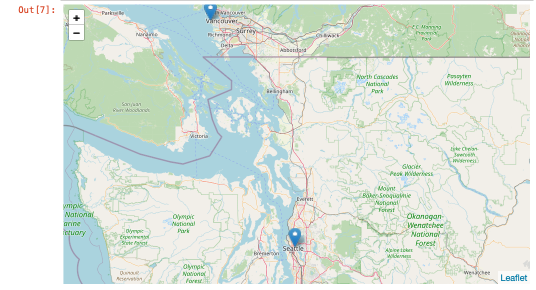

In [2]:
Image("//Users/BoTi/Desktop/us_can_map.png", width=500, height=500)

_2. Administrative division and clustering_

In order to analyse the socio-cultural offerings of both cities it is necessary to find the location of the most interesting venues.

As a starting point the data base of the postal codes was taken into consideration.

There is a publicly available full register of all postal codes in the US and Canada.

Filtering the codes of Vancouver and Seattle gave back still enormous database without the connection of the code to the name of the neighbourhood.

Therefore a different approach has been assumed, gather the information about neighbourhoods from the sites of Seattle and Vancouver municipalities.

Such gathered data was augmented by the information from Google Maps.

Such gathered data was prepared in the form of a csv-file and uploaded to the notebook.

As a result the dataframes containing the information on neighbourhoods in Seattle and Vancouver were createtd:

### Vancouver ###

In [21]:
van1

,MAPID,Name,latitude,longitude
0,AR,Arbutus-Ridge,49.246805,-123.161669
1,CBD,Downtown,49.280747,-123.116567
2,FAIR,Fairview,49.264540,-123.131049
3,GW,Grandview-Woodland,49.276440,-123.066728
4,HS,Hastings-Sunrise,49.277934,-123.040270
5,MARP,Marpole,49.210207,-123.128382
6,RP,Riley Park,49.244766,-123.103147
7,SHAU,Shaughnessy,49.245681,-123.139760
8,STR,Strathcona,49.278219,-123.088235
9,WE,West End,49.285011,-123.135438


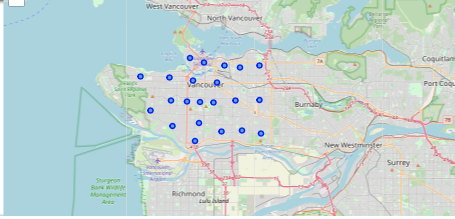

In [22]:
Image("//Users/BoTi/Desktop/vanc2_map.png", width=500, height=500)

### Seattle ###

In [29]:
stl1

,City,Name,latitude,longitude,geo_data
0,Seattle,Fremont,47.657288,-122.348277,"47.65728762006992,-122.34827650061001"
1,Seattle,Denny Triangle,47.619529,-122.339402,"47.61952916824775, -122.33940206127204"
2,Seattle,Seattle Chinatown,47.602146,-122.322944,"47.602145970581255, -122.32294405661024"
3,Seattle,Matthews Beach,47.700225,-122.274471,"47.70022520848284, -122.27447099462175"
4,Seattle,Northeast Seattle,47.679411,-122.291344,"47.679411151923766, -122.2913440947815"
5,Seattle,Bryant,47.674319,-122.287571,"47.67431884982148, -122.28757083346513"
6,Seattle,Northwest Seattle,47.693773,-122.343918,"47.69377320142052, -122.3439178619668"
7,Seattle,Capitol Hill,47.629681,-122.324021,"47.62968125746418, -122.32402128296313"
8,Seattle,Central District,47.611855,-122.295547,"47.6118548892842, -122.29554687447758"
9,Seattle,West Seattle,47.570683,-122.387498,"47.57068286086406, -122.38749789129703"


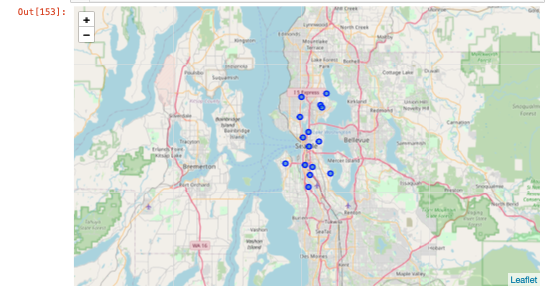

In [30]:
Image("//Users/BoTi/Desktop/stle2_map.png", width=500, height=500)

### Clustering ###

The neighbourhoods were clustered and presented in relation to the Universities.

This way the cluster lying the nearest vicinity to the future worplace will be analysed.

The maps below show the location of the neighbourhood cluster in relation to the Universities.

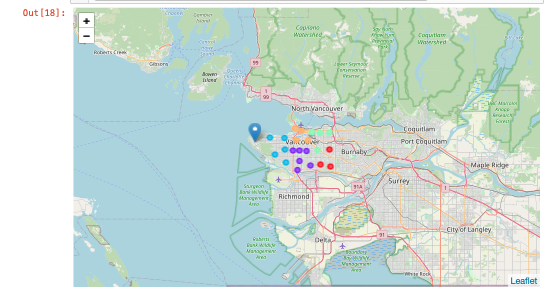

In [32]:
Image("//Users/BoTi/Desktop/vanc_clust_map.png", width=500, height=500)

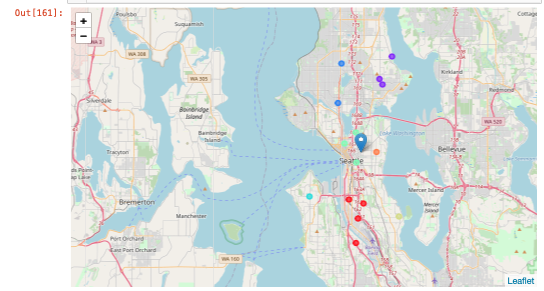

In [33]:
Image("//Users/BoTi/Desktop/stle_clust_map.png", width=500, height=500)

__III. ANALYSIS___

### Data from Foursquare ###

To import the data from Foursquare the centres of particular centroids were chosen with the radius of 1000 m.


From the sets received for both, Seattle and Vancouver only the venues of the particular type were selected.

Taking into account he interests of our fictitious character we analysed the number of venues of particular type in the set vicinity.

Below you can find the tables summarising the result of the survey.

For the calculation of the final result we assumed the weights for the particular areas of interest of prof. Kowalski as below:

| Fiekd of interest| Type of venue | Weight |
|------------------|---------------|---|
| contemporary art | Art gallery   | 20% |
| baroque music    | Concert Hall / Music Venue | 15% + 15% |
| drama            | Theatre       | 10%|
| film             | Cinema        | 5%|
| sailing          | Yachtclub or Harbor / Marina    | 35% |
|---|---|---|
|Total | - | 100% |
    

Results for Vancouver:
    
| Vanue Category | Number of instances | Weight | Result |
|---|---|---|---|
| Art Gallery | 3 | 20% | 0.60 |
| Concert Hall | 3 |15%| 0.45|
| Music Venue | 1 | 15% | 0.15 |
| Theater | 4 | 10% | 0.40 |
| Cinema | 0 | 5% | 0.00 |
| Harbor / Marina | 1 | 35% | 0.35 |
|---|---|---|---|
|TOTAL | 12 | 100% | 1.95 |    

Results for Seattle:
    
| Vanue Category | Number of instances | Weight | Result |
|---|---|---|---|
| Art Gallery | 1 | 20% | 0.20 |
| Concert Hall | 0 |15%| 0.00|
| Music Venue | 0 | 15% | 0.00 |
| Theater | 1 | 10% | 0.10 |
| Cinema | 0 | 5% | 0.00 |
| Harbor / Marina | 0 | 35% | 0.00 |
|---|---|---|---|
|TOTAL | 2 | 100% | 0.30 |




The above presented results obviously show that the __Vancouver's socio-cultural offer with 1.95 scoring is much richer  than Seattle's with scoring of 0.3.__

__IV. CONCLUSION__

If Prof. Kowalski wanted to limit homself to vicinity radius of only r=1000 m the conclusiuon is prety obvious.

Vancouver is a better choice than Seattle assuming everything else being the same, especially academic opportunities.

Therefore Prof. Kowalski should accept the proposal from the University of British Columbia in Vancouver, BC.

### V. PRESENTATION #

_The project will be presented inthe form of the_ __.ppt__ _presentation and posted to my github where it will be publicly accessible._